**Importing Libaries and Packages**

In [2]:
# import different packages and libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# set the display format for numbers
pd.options.display.float_format = '{:20.2f}'.format

# set the max columns to be displayed in output to 50 (way more than what we have)
pd.set_option('display.max_columns', 50)

**Reading the data from the excel sheet**

In [3]:
# read data from the first sheet in the workbook
df = pd.read_excel('./Data/online_retail_II.xlsx', sheet_name=0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


**Exploratory Data Analysis**

In [4]:
# get the meta data
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 122.9 MB


The Description and Customer ID columns have missing values. 

In [5]:
# descriptive stats
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


- The Quantity and Price variables both have negative values as their minumum, and that is odd.

In [6]:
# summary stats on object data
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
# missing Customer ID samples
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [8]:
# missing Description samples
df[df['Description'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.00,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.00,NaN,United Kingdom


In [9]:
# number of rows with null in Customer ID
df['Customer ID'].isna().sum()

np.int64(107927)

In [10]:
# rows that have missing values in both description and customer ID columns
missing_values_both = df[df['Customer ID'].isna() & df['Description'].isna()]
missing_values_both

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.00,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.00,NaN,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.00,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom


In [11]:
missing_values_both.shape

(2928, 8)

There are 2,928 records that have null values in both Description and Customer ID columns

In [12]:
# check negative records with negative Quantity values
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [13]:
len(df[df['Quantity'] < 0])

12326

There a 12,326 records that have negative Quantity values.

In [14]:
# finding rows whose invoice numbers start with C to mean cancellation

# convert invoice column data to string so that regex can be used
df['Invoice'] = df['Invoice'].astype('str')

# find rows where invoice doesn't contain numbers only
df[df['Invoice'].str.match('^\\d{6}$') == False]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [15]:
# validate if C is the only character that appears infront of the 6 digit invoice number
df['Invoice'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

There are also invoices that start with A.

In [16]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [17]:
df['StockCode'].value_counts()

StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
72045A       1
21863        1
21862        1
21052        1
79151B       1
Name: count, Length: 4632, dtype: int64

In [18]:
# check rows whwre StockCode doesn't have 5 digit values only

df['StockCode'] = df['StockCode'].astype('str')

df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [19]:
len(df[df['StockCode'].str.match('^\\d{5}$')])
print(len(df))

print(len(df) - len(df[df['StockCode'].str.match('^\\d{5}$')]))

525461
80112


In [20]:
df['StockCode'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [21]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]$') == False)].StockCode.unique()

array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [22]:
# check records that contain the unique non-numerical Stock Codes.
df[df['StockCode'].str.contains('^POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [23]:
unique_diff_stockcodes = df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]$') == False)].StockCode.unique()

# type(unique_diff_stockcodes)
unique_diff_stockcodes.shape

(60,)

In [24]:
# list to store sampled rows
sampled_rows = []

# iterate through each unique non integer stock code
for x in unique_diff_stockcodes:
    sampled_row = df[df['StockCode'] == x].sample(n=1)
    sampled_rows.append(sampled_row)

In [25]:
sampled_df = pd.concat(sampled_rows, ignore_index=True)
sampled_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,512538,POST,POSTAGE,3,2010-06-16 12:45:00,18.00,12613.00,Germany
1,491195,79323LP,LIGHT PINK CHERRY LIGHTS,4,2009-12-10 12:57:00,6.75,15805.00,United Kingdom
2,491498,15056BL,EDWARDIAN PARASOL BLACK,1,2009-12-11 12:17:00,5.95,12835.00,United Kingdom
3,C519809,D,Discount,-192,2010-08-20 12:51:00,0.01,16422.00,United Kingdom
4,496315,79323GR,GREEN CHERRY LIGHTS,1,2010-01-31 12:18:00,6.75,12748.00,United Kingdom
5,491971,DCGS0058,MISO PRETTY GUM,2,2009-12-14 18:37:00,0.83,NaN,United Kingdom
6,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
7,489609,DOT,DOTCOM POSTAGE,1,2009-12-01 14:50:00,74.61,NaN,United Kingdom
8,528594,15056bl,EDWARDIAN PARASOL BLACK,1,2010-10-22 14:23:00,12.72,NaN,United Kingdom
9,C536164,M,Manual,-5,2010-11-30 12:09:00,0.72,15369.00,United Kingdom


In [26]:
# filter dataframe for unique_diff_stockcodes
filtered_df = df[df['StockCode'].isin(unique_diff_stockcodes)]

# count of records for each of the unique stock codes in the filtered data
stockcode_count = filtered_df.groupby('StockCode').size().reset_index(name='Count')
print(stockcode_count)

       StockCode  Count
0        15056BL    597
1        15056bl     31
2        47503J       1
3        72024HC      1
4        79323GR    122
5        79323LP    231
6         ADJUST     67
7        ADJUST2      3
8      AMAZONFEE      9
9              B      3
10  BANK CHARGES     65
11            C2    138
12            C3      1
13             D    100
14      DCGS0003      9
15      DCGS0004      4
16      DCGS0006      1
17      DCGS0016      1
18      DCGS0027      1
19      DCGS0036      1
20      DCGS0037      2
21      DCGS0039      1
22      DCGS0041      1
23      DCGS0044      1
24      DCGS0053      1
25      DCGS0056      1
26      DCGS0058     31
27      DCGS0059      1
28      DCGS0060      1
29      DCGS0062      2
30     DCGS0066N      4
31      DCGS0068      2
32      DCGS0069      4
33      DCGS0070      1
34      DCGS0072      3
35      DCGS0075      1
36      DCGS0076     13
37      DCGSLBOY      1
38     DCGSLGIRL      1
39      DCGSSBOY     12
40     DCGSSGIRL

In [27]:
# count of all countries in the dataset
df.Country.value_counts()

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Thailand                    76
Hong Kong                   76


**Data Cleaning**

In [28]:
# create copy of the dataframe
clean_df = df.copy()

In [29]:
# cast the invoice values as strings
clean_df['Invoice'] = clean_df['Invoice'].astype('str')

# create a mask i.e a filter expression to be applied to the df
mask = (
    clean_df['Invoice'].str.match('^\\d{6}$') == True   # returns rows where the invoice contains 6 digit values only!
)

# apply filter to the df
clean_df = clean_df[mask]

clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [30]:
clean_df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
243409,512946,21034,REX CASH+CARRY JUMBO SHOPPER,2,2010-06-20 15:32:00,0.95,17625.00,United Kingdom
210963,509769,85099F,JUMBO BAG STRAWBERRY,5,2010-05-25 16:03:00,1.95,13048.00,United Kingdom
345965,523014,70006,LOVE HEART POCKET WARMER,1,2010-09-20 10:20:00,3.36,NaN,United Kingdom
370839,525216,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,2,2010-10-04 12:46:00,3.75,16205.00,United Kingdom
161974,504873,21796,SET OF 3 RED STRIPE BASKETS,1,2010-04-18 12:36:00,12.75,14817.00,United Kingdom
100610,498901,22284,HEN HOUSE DECORATION,1,2010-02-23 14:12:00,1.65,15311.00,United Kingdom
421717,529748,22167,"WALL MIRROR , DIAMANTE OVAL SHAPE",1,2010-10-29 14:19:00,20.38,NaN,United Kingdom
324558,521019,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,6,2010-09-01 15:08:00,9.95,16292.00,United Kingdom
155216,504140,21614,SET OF 12 ROSE BOTANICAL T-LIGHTS,2,2010-04-11 12:45:00,2.95,16814.00,United Kingdom
75596,496301,20674,GREEN SPOTTY BOWL,24,2010-01-31 11:01:00,1.25,16718.00,United Kingdom


In [31]:
# clean the stock codes

# cast the stock codes as strings
clean_df['StockCode'] = clean_df['StockCode'].astype('str')

# create mask to filter the data
stock_mask = (
    (clean_df['StockCode'].str.match('^\\d{5}$') == True) | (clean_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True) | (clean_df['StockCode'].str.match('^PADS$') == True)
)

clean_df = clean_df[stock_mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [32]:
# drop null customer ID records
clean_df.dropna(subset=['Customer ID'], inplace=True)
clean_df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_7088\2408988298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(subset=['Customer ID'], inplace=True)


(406337, 8)

In [33]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [34]:
clean_df[clean_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [35]:
len(clean_df[clean_df['Price'] == 0])

28

In [36]:
clean_df = clean_df[clean_df['Price'] > 0]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [37]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [38]:
clean_df.Price.min()

np.float64(0.001)

In [39]:
# Check size of data lost
remaining_data = round(
    (len(clean_df) * 100)/len(df), 2
)

lost_data = round((100 - remaining_data), 2)

print(f"After cleaning, about {remaining_data} % of the original is retained, and {lost_data} % lost")


After cleaning, about 77.32 % of the original is retained, and 22.68 % lost


**Feature Engineering**

In [40]:
# compute transaction sales
clean_df['TransactionSale'] = clean_df['Price'] * clean_df['Quantity']
clean_df

C:\Users\HP\AppData\Local\Temp\ipykernel_7088\692293499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['TransactionSale'] = clean_df['Price'] * clean_df['Quantity']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TransactionSale
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [41]:
#nununique => number of unique values
aggregated_df = clean_df.groupby(by="Customer ID", as_index=False)\
    .agg(
        MonetaryValue = ('TransactionSale', 'sum'),
        Frequency = ('Invoice', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max')
    )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [42]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [43]:
# assume the max invoice date is the latest date (since this data is pretty old abt 14 years old)

# get the recency of transaction from the 'latest date' in days
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


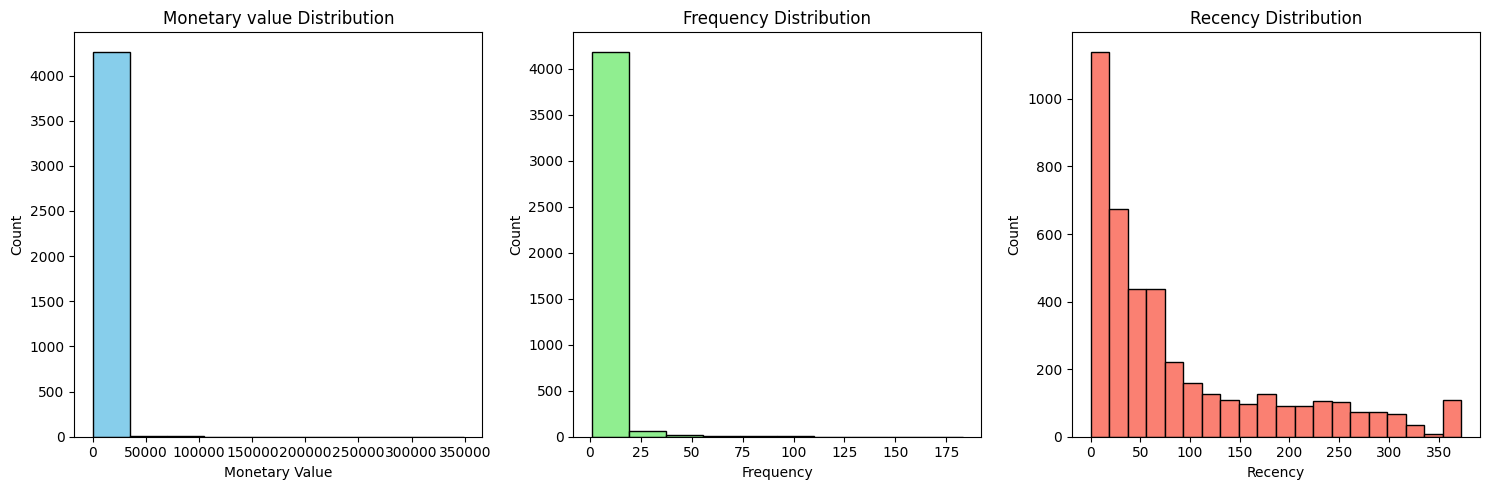

In [44]:
# check distribution of customer data according to RFM

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary value Distribution')
# plt.xlim(aggregated_df['MonetaryValue'].min(), aggregated_df['MonetaryValue'].max())
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The monetary value and frequency distributions are right skews

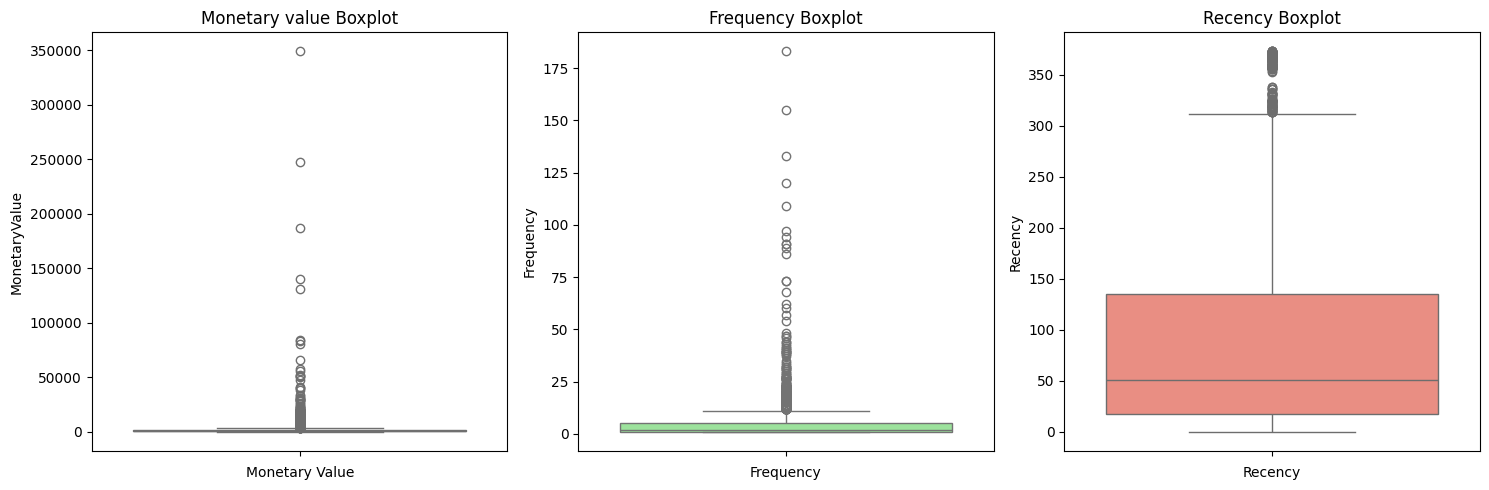

In [45]:
# check for outliers using boxplots
# check distribution of customer data according to RFM

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary value Boxplot')
# plt.xlim(aggregated_df['MonetaryValue'].min(), aggregated_df['MonetaryValue'].max())
plt.xlabel('Monetary Value')


plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')


plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')


plt.tight_layout()
plt.show()

In [46]:
# dealing with outliers

M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

M_lower_lim = M_Q1 -(1.5*M_IQR)
M_upper_lim = M_Q3 + (1.5*M_IQR)

Monetary_Outliers = aggregated_df[
    (aggregated_df['MonetaryValue'] > M_upper_lim) | (aggregated_df['MonetaryValue'] < M_lower_lim)
].copy()

Monetary_Outliers.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [47]:

F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

F_lower_lim = F_Q1 -(1.5*F_IQR)
F_upper_lim = F_Q3 + (1.5*F_IQR)

Frequency_Outliers = aggregated_df[
    (aggregated_df['Frequency'] > F_upper_lim) | (aggregated_df['Frequency'] < F_lower_lim)
].copy()

Frequency_Outliers.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [48]:
# test_df = aggregated_df[(~aggregated_df.index.isin(Monetary_Outliers.index))]
# test_df.head(3)

In [49]:
outlier_mask = (
    (~aggregated_df.index.isin(Monetary_Outliers.index)) & (~aggregated_df.index.isin(Frequency_Outliers.index))
)

outliers_absent_df = aggregated_df[outlier_mask]

outliers_absent_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


In [50]:
len(outliers_absent_df)/len(aggregated_df)

0.8889148191365227

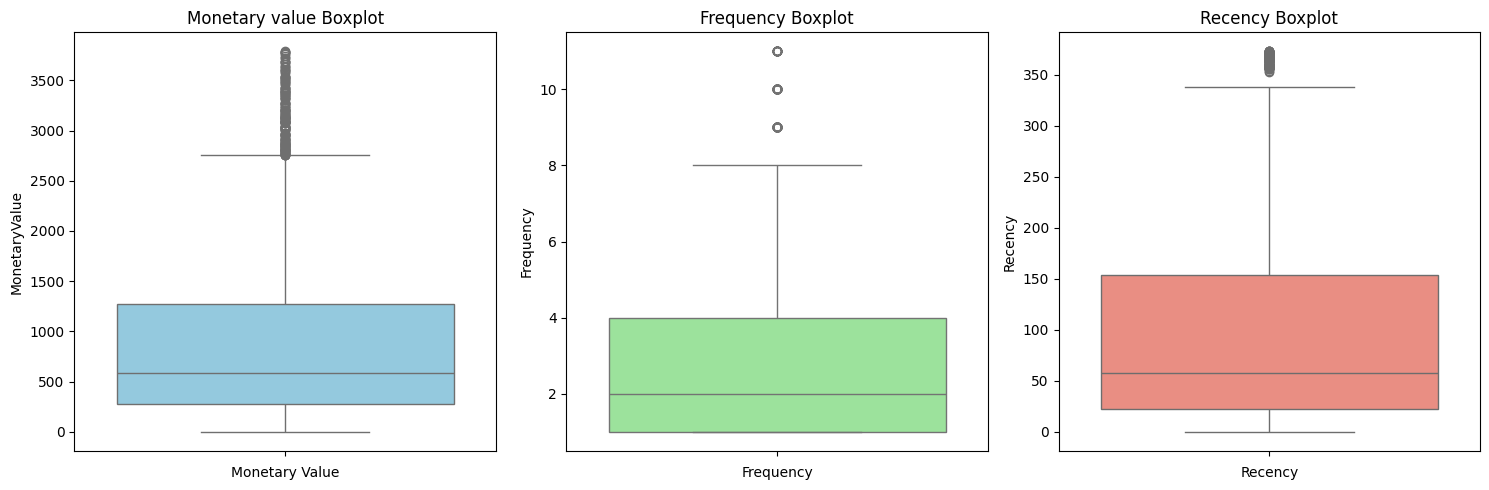

In [51]:
# check for outliers using boxplots
# check distribution of customer data according to RFM

plt.figure(figsize=(15, 5))

# plt.title('Boxplots of Customer data without outliers', loc='center', pad=25)

plt.subplot(1, 3, 1)
sns.boxplot(data=outliers_absent_df['MonetaryValue'], color='skyblue')
plt.title('Monetary value Boxplot')
# plt.xlim(aggregated_df['MonetaryValue'].min(), aggregated_df['MonetaryValue'].max())
plt.xlabel('Monetary Value')


plt.subplot(1, 3, 2)
sns.boxplot(data=outliers_absent_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')


plt.subplot(1, 3, 3)
sns.boxplot(data=outliers_absent_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')


plt.tight_layout()
plt.show()

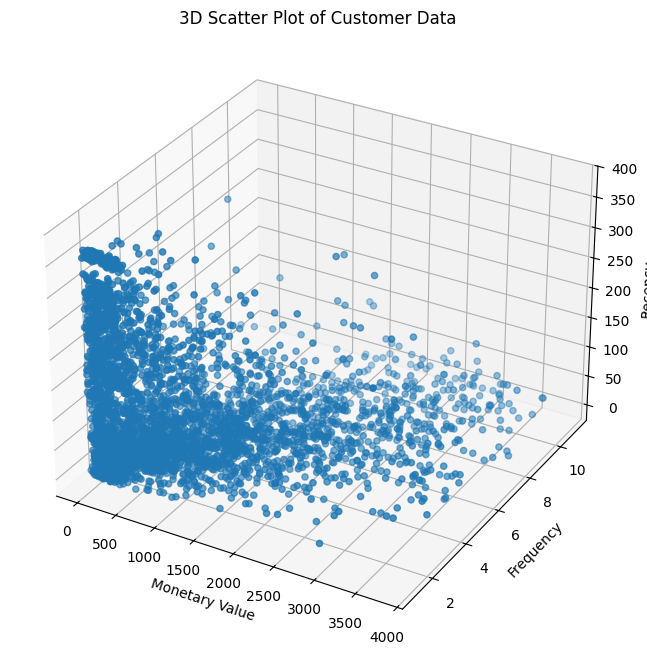

In [52]:
 # 3D plot of customer data

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(outliers_absent_df['MonetaryValue'], outliers_absent_df['Frequency'], outliers_absent_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show();

**Scaling the Data**

Standard Scaling is to be used to standardize the values.

In [53]:
std_scaler = StandardScaler()

scaled_data = std_scaler.fit_transform(outliers_absent_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [54]:
# convert array to df

scaled_data_df = pd.DataFrame(scaled_data, index=outliers_absent_df.index, columns=('MonetaryValue', 'Frequency', 'Recency'))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


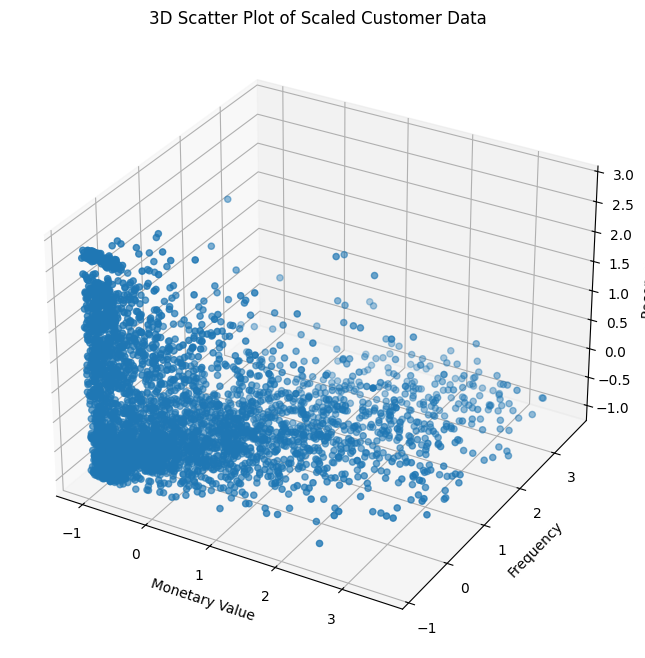

In [55]:
 # 3D plot of customer data

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Scaled Customer Data')

plt.show();

**K-Means Clustering**

- The Elbow Method is a method used to help determine/select the optimal number of clusters bu fitting the model with a range of values of K.

- In K-Means clustering, inertia (also known as Sum of Squared Errors or SSE) is a measure of the total distance between each data point and its assigned cluster center, or centroid. It represents the “within-cluster” variance or dispersion.

- The goal of K-Means is to minimize inertia by iteratively updating the cluster centers and assigning data points to the closest center.


In [56]:
# set a maximum value for the range of K
max_k = 12

# initialize empty inertia list
inertia = []
# silhouette score list
silhouette_scores = []

# specify range of K values to be iterated over
k_values = range(2, max_k +1)


for k in k_values:

    # initialize model
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    # fit the model
    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, labels=cluster_labels)
    
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

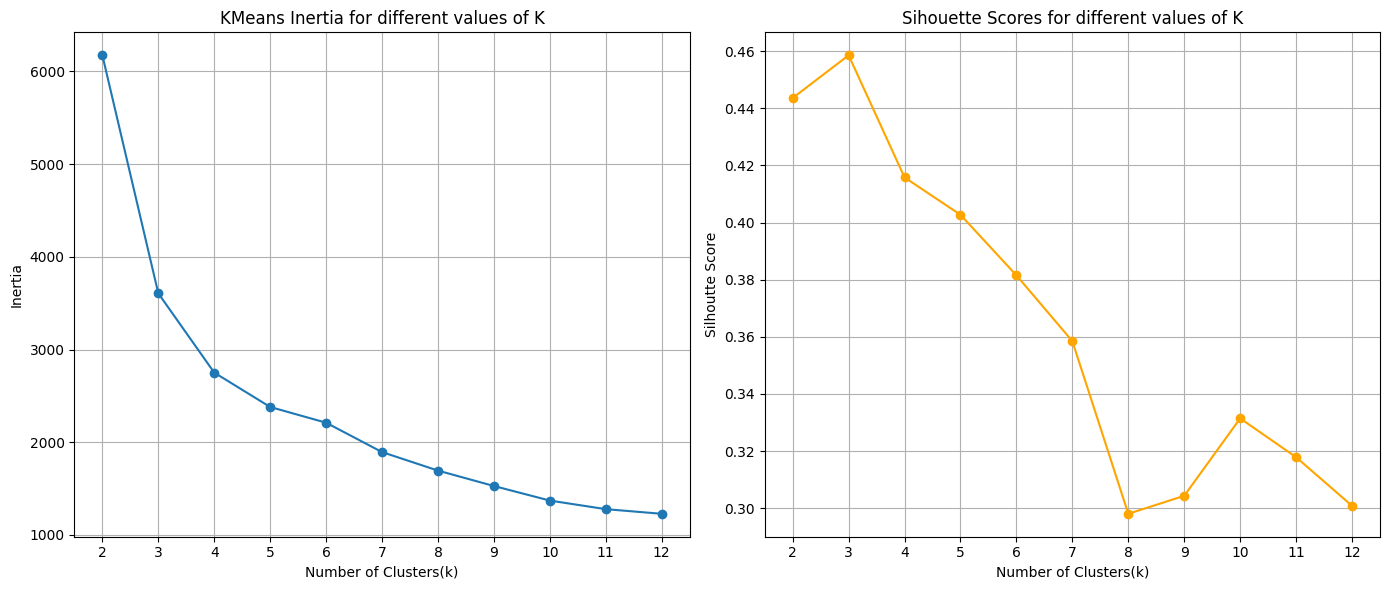

In [57]:
plt.figure(figsize=(14, 6))


# line plot to show inertia and k values
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for different values of K')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


# line plot to show silhouette score and k values
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Sihouette Scores for different values of K')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
# create final model
kmeans_final = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels_final = kmeans_final.fit_predict(scaled_data_df)

cluster_labels_final

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [59]:
outliers_absent_df['Cluster'] = cluster_labels_final

outliers_absent_df

C:\Users\HP\AppData\Local\Temp\ipykernel_7088\2847234185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_absent_df['Cluster'] = cluster_labels_final


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


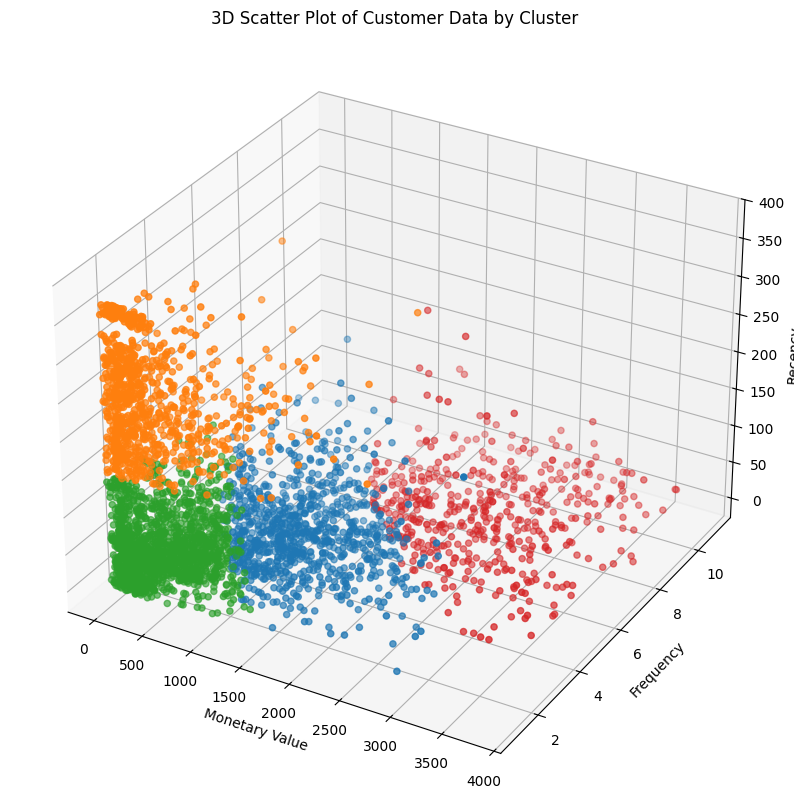

In [60]:
 # 3D plot of customer data with cluster labels

cluster_colors = {
    0: '#1f77b4', # Blue
    1: '#ff7f0e', # Orange
    2: '#2ca02c', # Green
    3: '#d62728' # Red
}

colors =  outliers_absent_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(outliers_absent_df['MonetaryValue'], outliers_absent_df['Frequency'], outliers_absent_df['Recency'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show();

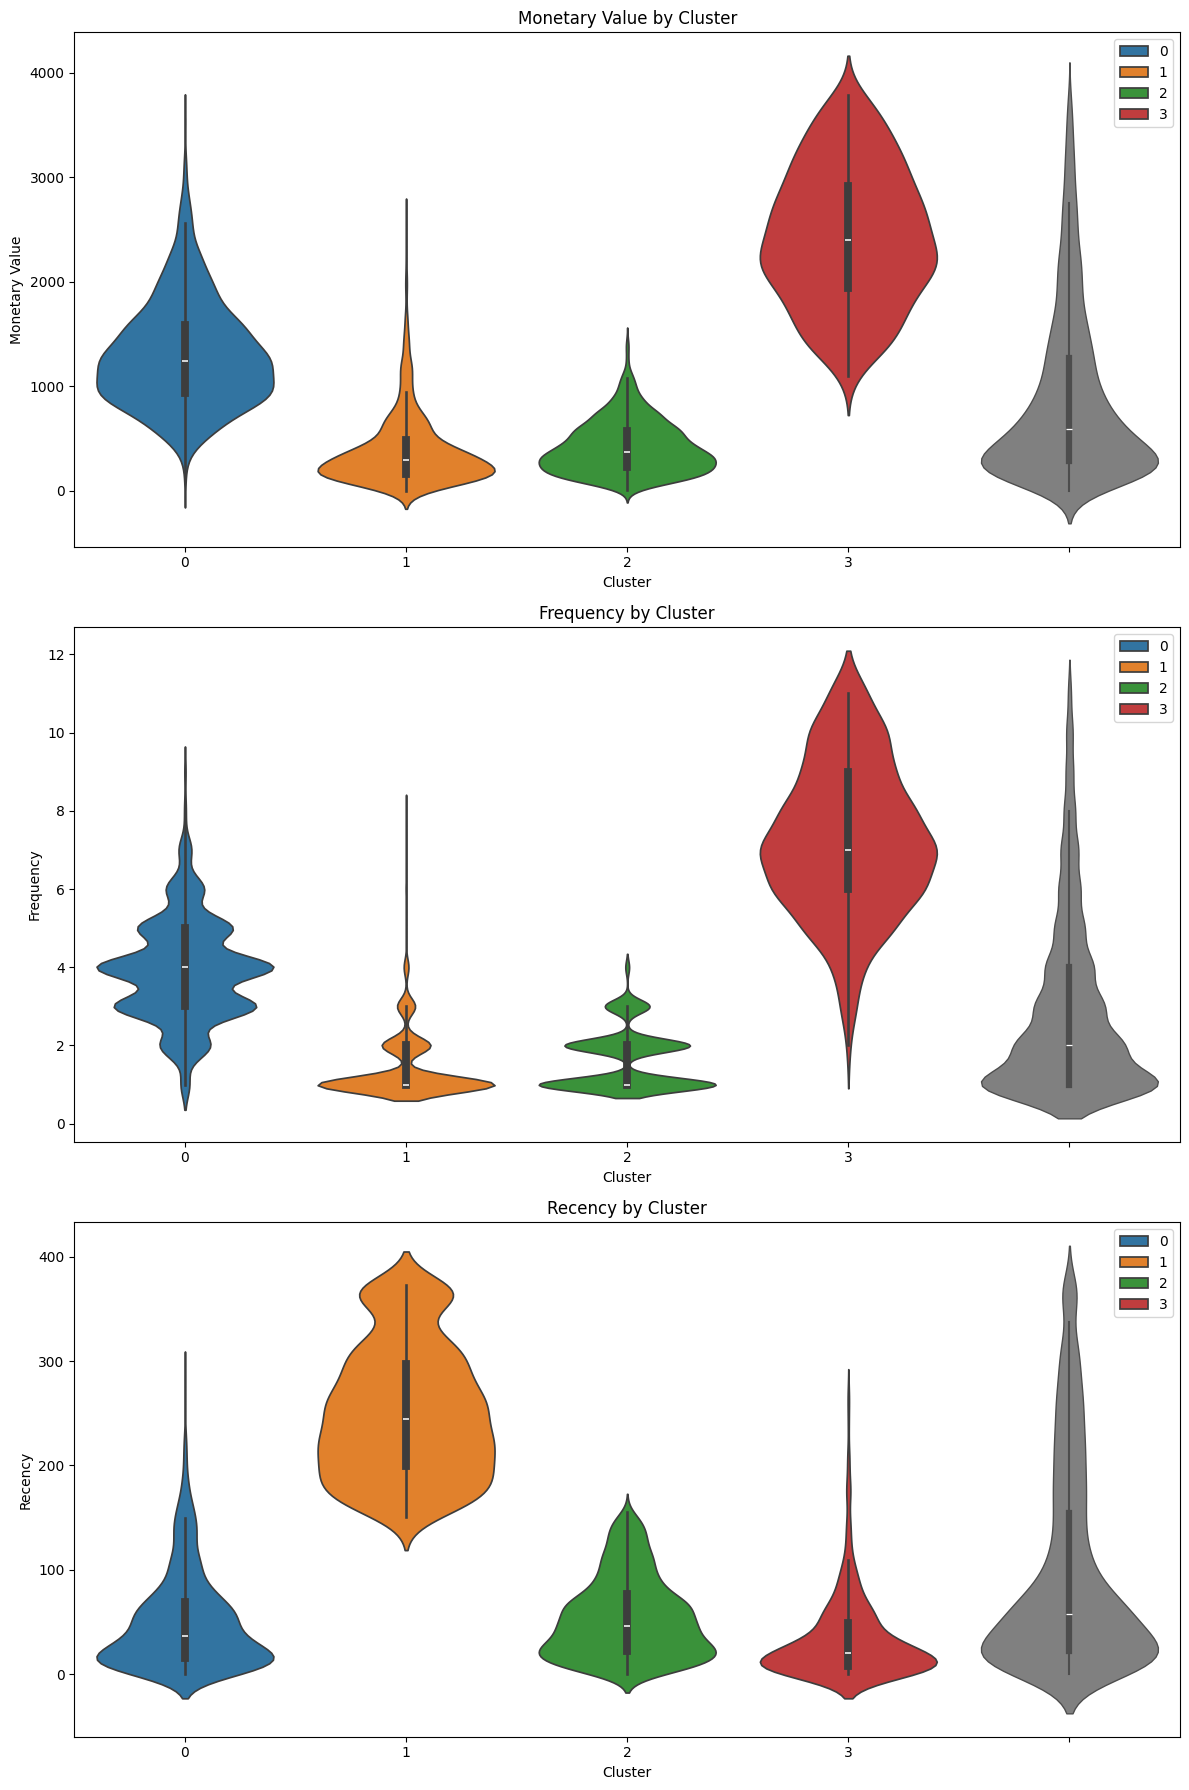

In [61]:
# using violin plots to understand the distribution of the data
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_absent_df['Cluster'], y=outliers_absent_df['MonetaryValue'], palette=cluster_colors, hue=outliers_absent_df['Cluster'])
# use for reference
sns.violinplot(y=outliers_absent_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_absent_df['Cluster'], y=outliers_absent_df['Frequency'], palette=cluster_colors, hue=outliers_absent_df['Cluster'])
sns.violinplot(y=outliers_absent_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_absent_df['Cluster'], y=outliers_absent_df['Recency'], palette=cluster_colors, hue=outliers_absent_df['Cluster'])
sns.violinplot(y=outliers_absent_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Findings**

1. <u>Cluster 0 (Blue)</u> 

    Name: "Retain"

    Rationale: The cluster represents high-value customers who purchase regularly, though haven't made purchases recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

    Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.


2. <u>Cluster 1 (Orange)</u>

    Name: "Re-Engage"

    Rationale: The cluster represents lower-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back to active purchasing behaviour.
    
    Action: Use target marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.


3. <u>Cluster 2 (Green)</u>

    Name: "Nurture"

    Rationale: This group includes low-value, low-frequency customers who have made recent purchases. The customers may need nurturing to increase their engagement and spending. They can also be new customers.

    Action: Focus on building relationships, providing excellent customer service, and incentivicing the customers to encourage their purchasing frequencies.


4. <u>Cluster 3 (Red)</u>

    Name: "Reward"

    Rationale: This cluster represents high-value, highly frequent buyers who are still actively purchasing. They are assumed to be the most loyal customers, and rewarding their loyalty will help maintain their engagement.
    
    Action: Implement a robust loyalty program, provide exlusive offers, and recognize their loyalty to keep them engaged and satisfied.



**Summary of Cluster Name**

| Cluster| Name | Brief Description|
|:------:|:------:|:----------------:|
|0|Retain|High-value customers who purchase regularly but haven't recently. Focus on retention.|
|1|Re-Engage|Low-value, infrequent buyers who haven't purchased recently. Focus on re-engagement.|
|2|Nurture|Low-value, low-frequency customers who purchased recently. Focus on increasing engagement.|
|3|Reward|High-value, frequent buyers who are actively purchasing. Focus on rewarding loyalty.|

**Understanding the outlier data**

In [62]:
# indices that point to overlapping between the two outliers dataframes
overlap_indices = Monetary_Outliers.index.intersection(Frequency_Outliers.index)
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [64]:
Only_monetary_outliers = Monetary_Outliers.drop(overlap_indices)
Only_frequency_outliers = Frequency_Outliers.drop(overlap_indices)

monetary_and_frequency_outliers = Monetary_Outliers.loc[overlap_indices]

In [66]:
Only_monetary_outliers['Cluster'] = -1
Only_frequency_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3


outlier_clusters_df = pd.concat([Only_monetary_outliers, Only_frequency_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


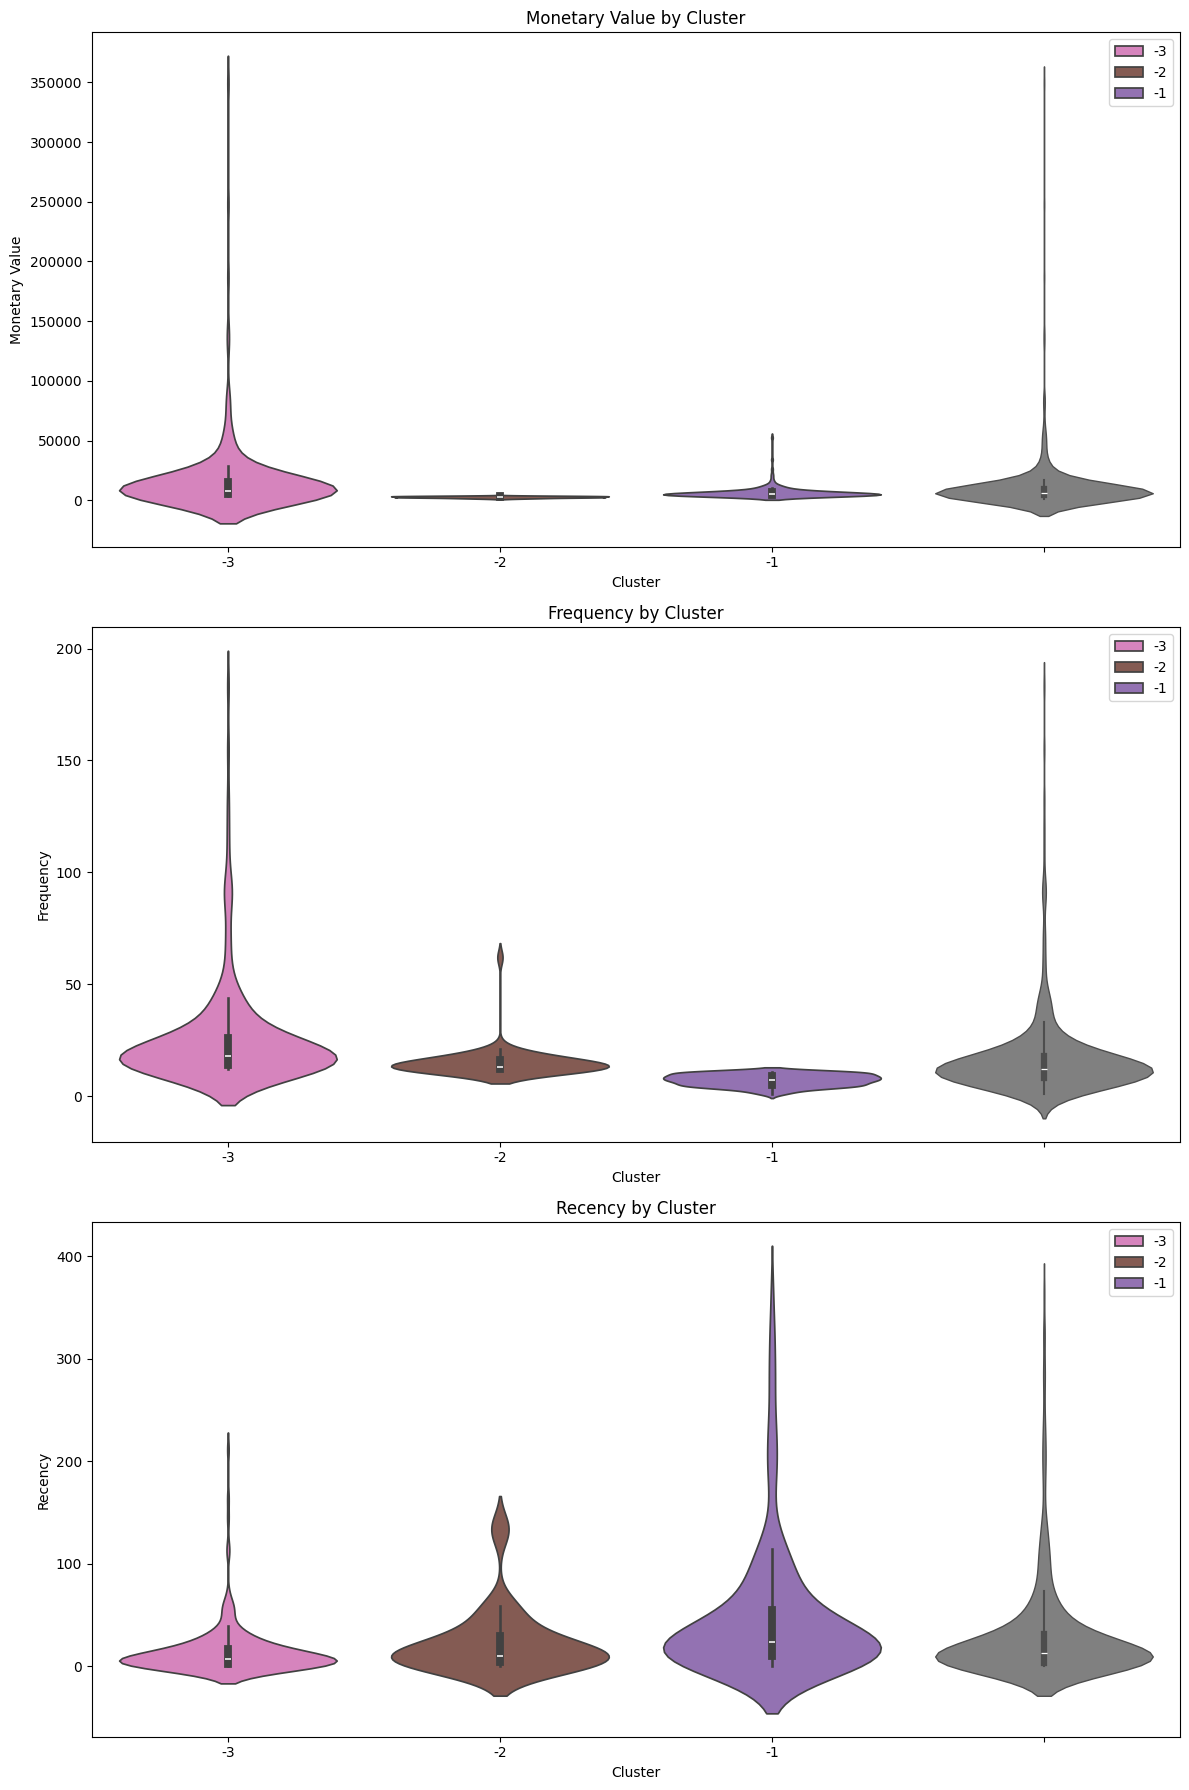

In [67]:
outlier_cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

# violin plots tp compare the outlier data
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=outlier_cluster_colors, hue=outlier_clusters_df['Cluster'])
# use for reference
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=outlier_cluster_colors, hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=outlier_cluster_colors, hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. <u>Cluster -1 (Monetary Outliers)</u> 

    Name: "PAMPER"

    Rationale: The cluster represents high spenders but not necessarily frequeny buyers.Their purchases are large and infrequent.

    Action: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.


2. <u>Cluster -2 (Frequency Outliers)</u>

    Name: "UPSELL"

    Rationale: The cluster represents frequent buyers who spend less per purchase. The customers are consistently engaged but might benefit from upselling opportunities.
    
    Action: Implement loyalty programs or bundle deals to encourage higher spending per visit, given frequent engagement.


3. <u>Cluster -3 (Monetary and Frequency Outliers)</u>

    Name: "DELIGHT"

    Rationale: This group represent the most valuable outliers with extreme spending and frequency purchases. They are likely your top-tier customers who require special attention.

    Action: Develop VIP programs, exclusive offers to maintain their loyalty and encourage continued engagement.


In [68]:
# Adding labels to the dataset
combined_cluster_labels = {
    0: 'RETAIN',
    1: 'RE-ENGAGE',
    2: 'NURTURE',
    3: 'REWARD',
    -1: 'PAMPER',
    -2: 'UPSELL',
    -3: 'DELIGHT'

}

In [69]:
full_clustering_df = pd.concat([outliers_absent_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [70]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(combined_cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


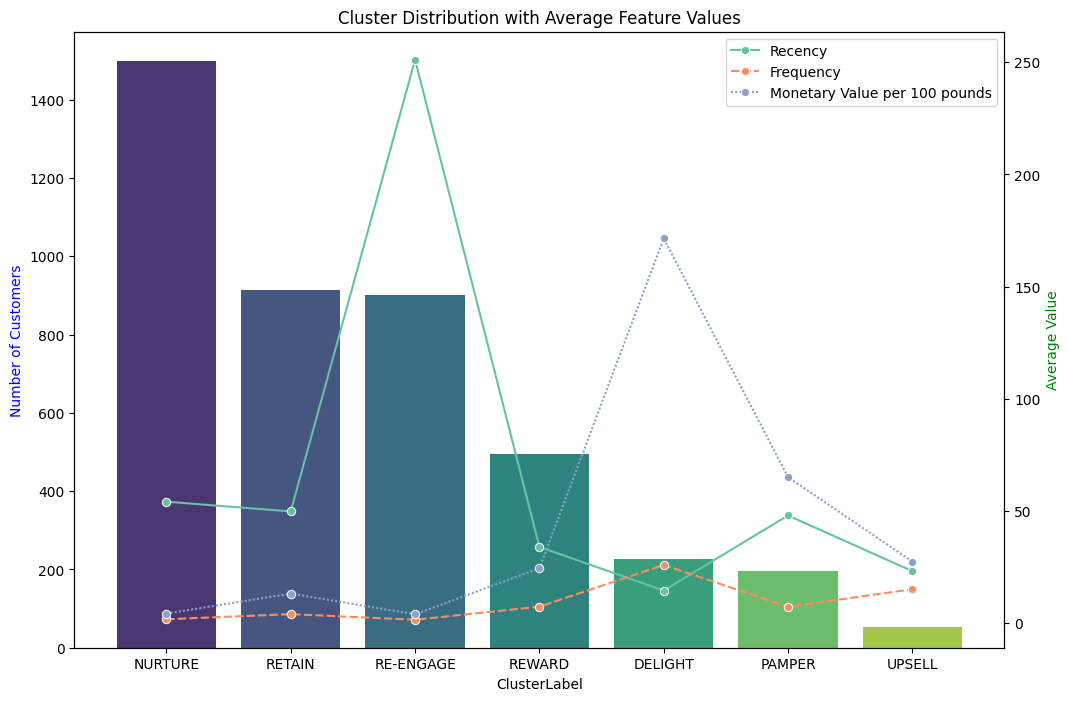

In [73]:
# Visualizing the results/ findings

# count for each cluster
cluster_count = full_clustering_df['ClusterLabel'].value_counts()
# averagges
full_clustering_df['Monetary Value per 100 pounds'] = full_clustering_df['MonetaryValue'] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'Monetary Value per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_count.index, y=cluster_count.values, ax=ax1, palette='viridis', hue=cluster_count.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()